# Part 1. Getting Started- Load Packages

In [ ]:
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-xt_4hfxr
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-xt_4hfxr
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-vwmbxy_k/pyfolio_cc18cb7815d446baaf565f8c59c404cb
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-vwmbxy_k/pyfolio_cc18cb7815d446baaf565f8c59c404cb
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-vwmbxy_k/elegantrl_db75460385a447e5be0c7b86022df3ec
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-vwmbxy_k/elegantrl_db75460385a447e5be0c7b86022df3ec
     |████████████████████████████████| 2.3 MB 6.7 MB/s 
     |████████████████████████████████| 234 kB 37.8 MB/s 
     |██████████████████████

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl import config
from finrl import config_tickers
from finrl.config import INDICATORS
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
#from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
#from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [ ]:
from env_reverse import StockTradingEnv

In [ ]:
from model_with_reverse_env_ppo import DRLAgent,DRLEnsembleAgent

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
print(config_tickers.DOW_30_TICKER)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


# Part 2. Download Data

In [ ]:
df = YahooDownloader(start_date = '2009-04-01',
                     end_date = '2018-09-01',
                     ticker_list = config_tickers.DOW_30_TICKER).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.314394,589372000.0,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477936,10850100.0,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772779,27701800.0,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850739,9288800.0,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820395,15308300.0,CAT,2


In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-04-01,3.717500,3.892857,3.710357,3.314394,589372000.0,AAPL,2
1,2009-04-01,48.779999,48.930000,47.099998,36.477936,10850100.0,AMGN,2
2,2009-04-01,13.340000,14.640000,13.080000,11.772779,27701800.0,AXP,2
3,2009-04-01,34.520000,35.599998,34.209999,26.850739,9288800.0,BA,2
4,2009-04-01,27.500000,29.520000,27.440001,19.820395,15308300.0,CAT,2


In [ ]:
len(df.tic.unique())

29

# Part 3: Preprocess Data

In [ ]:
df.tic.value_counts()

AAPL    2373
JPM     2373
WBA     2373
VZ      2373
V       2373
UNH     2373
TRV     2373
PG      2373
NKE     2373
MSFT    2373
MRK     2373
MMM     2373
MCD     2373
KO      2373
JNJ     2373
AMGN    2373
INTC    2373
IBM     2373
HON     2373
HD      2373
GS      2373
DIS     2373
CVX     2373
CSCO    2373
CRM     2373
CAT     2373
BA      2373
AXP     2373
WMT     2373
Name: tic, dtype: int64

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


# Part 4. Design Environment

In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
    
}

# Part 5: Run the Model

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2009-04-01'
train_end = '2017-07-01'
val_test_start = '2017-07-01'
val_test_end = '2018-09-01'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10_000,
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  171.5880355506054
======Model training from:  2009-04-01 to  2017-07-03
======PPO Training========
{'ent_coef': 0.01, 'n_steps': 2048, 'learning_rate': 0.00025, 'batch_size': 64}
Using cpu device
Logging to tensorboard_log/ppo/ppo_126_3
---------------------------------
| time/              |          |
|    fps             | 91       |
|    iterations      | 1        |
|    time_elapsed    | 22       |
|    total_timesteps | 2048     |
| train/             |          |
|    reward          | 77.11305 |
---------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 93          |
|    iterations           | 2           |
|    time_elapsed         | 43          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.015716644 |
|    clip_fraction        | 0.231       |
|    cli

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,PPO Sharpe,PPO REVERSE Sharpe
0,126,2017-07-03,2017-10-02,PPO,0.067454,0.061592
1,189,2017-10-02,2018-01-02,PPO,0.254936,0.056522
2,252,2018-01-02,2018-04-04,PPO with reverse action space,-0.235533,0.110644


# Part 6: Backtest Our Strategy

In [ ]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))


    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  -0.3165493011127343


In [ ]:
print(df_account_value)


     account_value        date  daily_return    datadate
0     1.000000e+06  2017-10-02           NaN  2017-10-02
1     1.000216e+06  2017-10-03      0.000216  2017-10-03
2     1.002203e+06  2017-10-04      0.001987  2017-10-04
3     1.002146e+06  2017-10-05     -0.000057  2017-10-05
4     9.997140e+05  2017-10-06     -0.002427  2017-10-06
..             ...         ...           ...         ...
184   9.838966e+05  2018-06-26     -0.001177  2018-06-26
185   9.804643e+05  2018-06-27     -0.003488  2018-06-27
186   9.657250e+05  2018-06-28     -0.015033  2018-06-28
187   9.543283e+05  2018-06-29     -0.011801  2018-06-29
188   9.431624e+05  2018-07-02     -0.011700  2018-07-02

[189 rows x 4 columns]


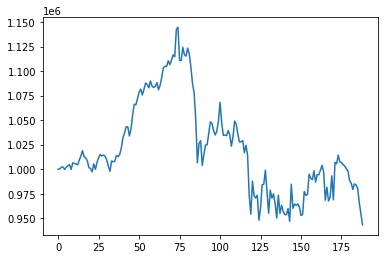

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

# 6.1 BackTestStats

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return         -0.075056
Cumulative returns    -0.056838
Annual volatility      0.190608
Sharpe ratio          -0.316549
Calmar ratio          -0.426368
Stability              0.202903
Max drawdown          -0.176036
Omega ratio            0.944148
Sortino ratio         -0.437005
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.921735
Daily value at risk   -0.024254
dtype: float64


In [ ]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value.loc[0,'date'],
        end = df_account_value.loc[len(df_account_value)-1,'date'])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (188, 8)
Annual return          0.103134
Cumulative returns     0.075975
Annual volatility      0.151288
Sharpe ratio           0.728208
Calmar ratio           0.890250
Stability              0.200844
Max drawdown          -0.115849
Omega ratio            1.144360
Sortino ratio          0.952109
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.891258
Daily value at risk   -0.018623
dtype: float64


# 6.2 BackTestPlot

==============Compare to DJIA===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (188, 8)


Start date,2017-10-02
End date,2018-07-02
Total months,9
,Backtest
Annual return,-7.506%
Cumulative returns,-5.684%
Annual volatility,19.061%
Sharpe ratio,-0.32
Calmar ratio,-0.43
Stability,0.20
Max drawdown,-17.604%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.60,2018-01-18,2018-07-02,NaT,NaN
1,2.12,2017-10-23,2017-10-31,2017-11-27,26
2,0.89,2017-12-01,2017-12-04,2017-12-06,4
3,0.83,2017-12-21,2017-12-29,2018-01-03,10
4,0.56,2017-12-13,2017-12-14,2017-12-18,4


Stress Events,mean,min,max
New Normal,-0.02%,-4.12%,3.99%


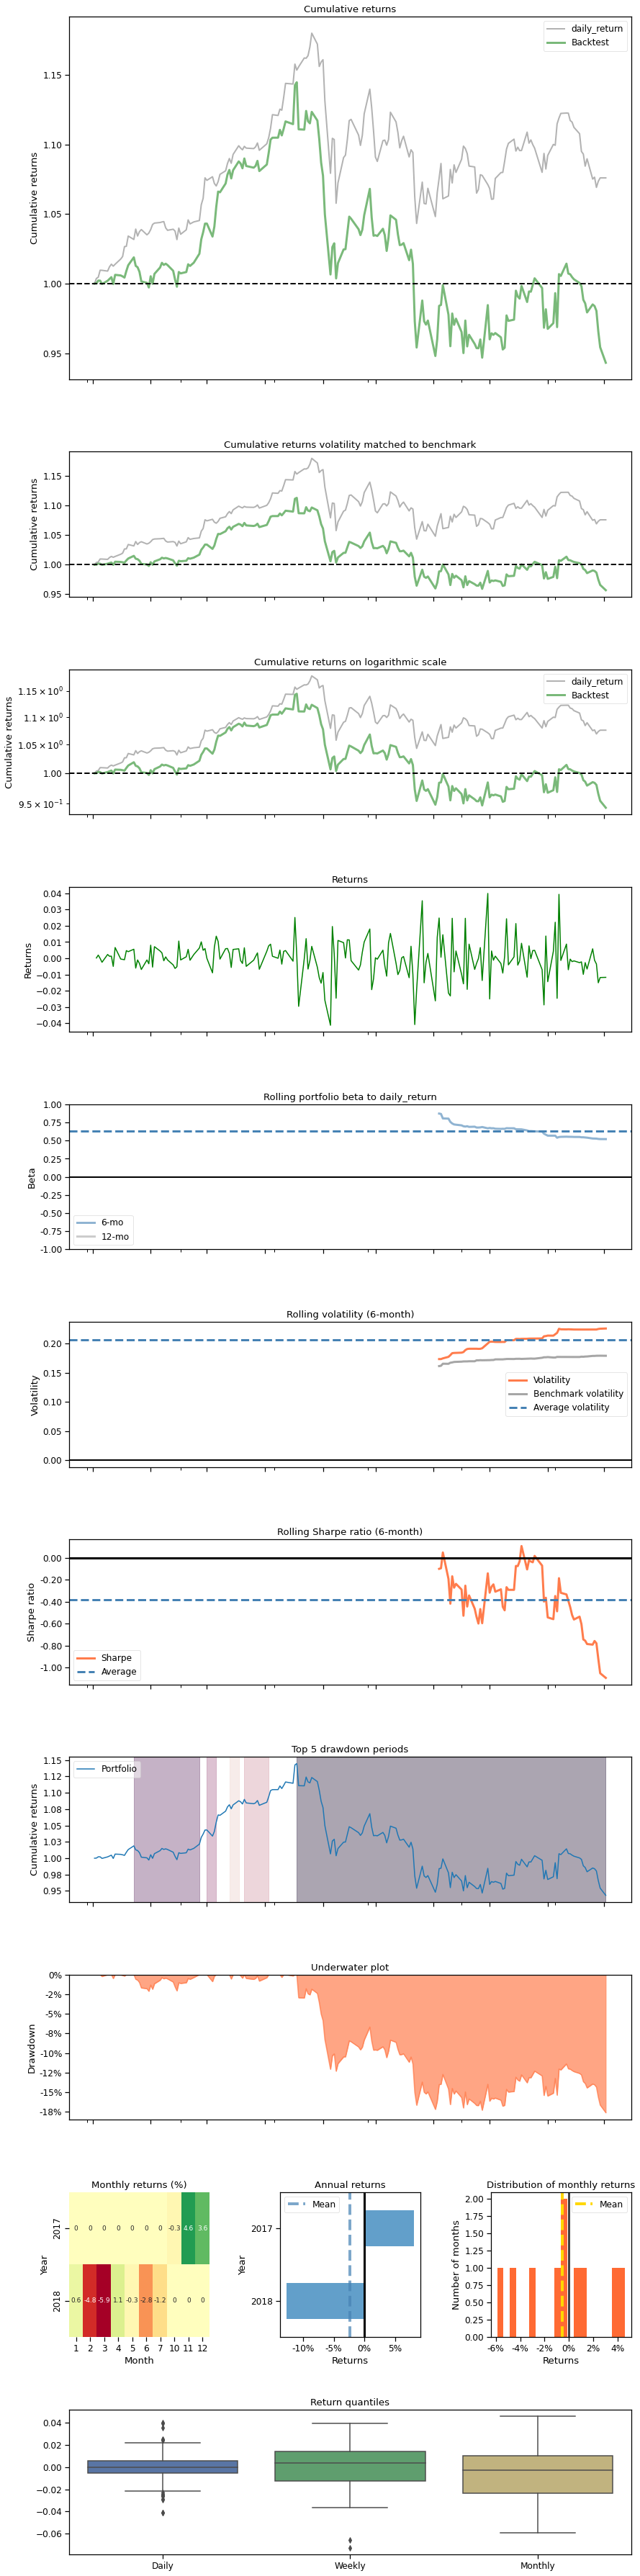

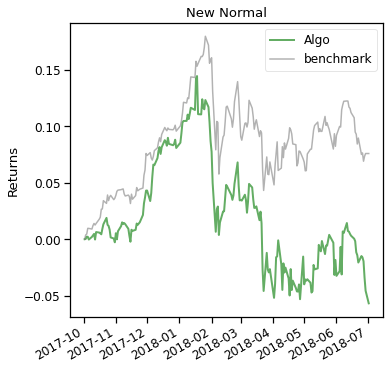

In [ ]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])